**Movie Recommender System using Python** 

Here we will be using MovieLens dataset to create recommending system based of corelation between the movies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
moviedf = pd.read_csv("movies.csv")
moviedf.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratingdf = pd.read_csv("ratings.csv")
ratingdf.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Processing of dataset**

In [4]:
moviedf = moviedf.merge(ratingdf,on="movieId")
moviedf

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [5]:
# NULL ANALYSIS
print(moviedf.shape)
moviedf.isnull().sum()

(100836, 6)


movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [6]:
# Dropping the timestamp column

moviedf = moviedf.drop(["timestamp"],axis = 1)
moviedf.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


**Exploratory Data Analysis**

In [7]:
# Mean value of rating and movies having high ratings
moviedf.groupby("title")["rating"].mean().sort_values(ascending= False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

Those movies are having rating of 5 but the count of ratings given to the movies may be less

In [8]:
# Highest count of ratings given to movies
moviedf.groupby("title")["rating"].count().sort_values(ascending= False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

These are the movies with highest number of rating counts

In [9]:
# extract movies and their mean rating

rating = pd.DataFrame(moviedf.groupby("title")["rating"].mean().reset_index())
rating.head()

,title,rating
0,'71 (2014),4.0
1,'Hellboy': The Seeds of Creation (2004),4.0
2,'Round Midnight (1986),3.5
3,'Salem's Lot (2004),5.0
4,'Til There Was You (1997),4.0


In [10]:
# Adding the number of rating to the dataset

rating["rating_counts"] = pd.DataFrame(moviedf.groupby("title")["rating"].count()).reset_index()["rating"]
rating.head()

,title,rating,rating_counts
0,'71 (2014),4.0,1
1,'Hellboy': The Seeds of Creation (2004),4.0,1
2,'Round Midnight (1986),3.5,2
3,'Salem's Lot (2004),5.0,1
4,'Til There Was You (1997),4.0,2


In [11]:
rating

,title,rating,rating_counts
0,'71 (2014),4.000000,1
1,'Hellboy': The Seeds of Creation (2004),4.000000,1
2,'Round Midnight (1986),3.500000,2
3,'Salem's Lot (2004),5.000000,1
4,'Til There Was You (1997),4.000000,2
...,...,...,...
9714,eXistenZ (1999),3.863636,22
9715,xXx (2002),2.770833,24
9716,xXx: State of the Union (2005),2.000000,5
9717,¡Three Amigos! (1986),3.134615,26


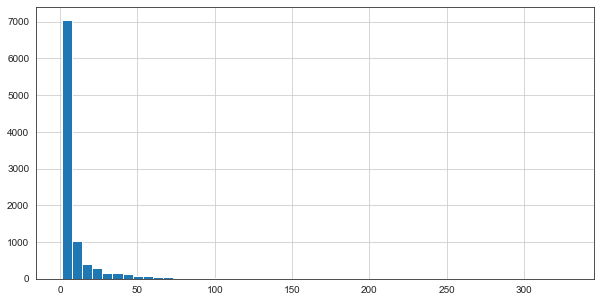

In [12]:
# Ploting Histogram for count of ratings
plt.figure(figsize = (10,5))
rating["rating_counts"].hist(bins = 50)
plt.show()

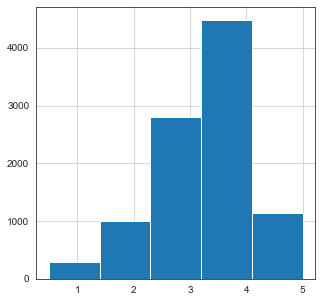

In [13]:
# Ploting Histogram for ratings
plt.figure(figsize = (5,5))
rating["rating"].hist(bins = 5)
plt.show()

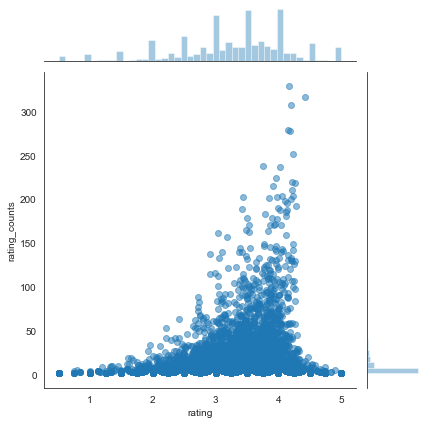

In [14]:
# Relationship between rating and count of rating

sns.jointplot(x= rating["rating"],y= rating["rating_counts"],alpha = 0.5)

So Now we have some idea on how the data is

**Designing the Recommendation System**

In [15]:
moviedf.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [16]:
movie_user = moviedf.pivot_table(index="userId", columns="title",values="rating")

In [17]:
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
rating.sort_values("rating_counts",ascending=False)

,title,rating,rating_counts
3158,Forrest Gump (1994),4.164134,329
7593,"Shawshank Redemption, The (1994)",4.429022,317
6865,Pulp Fiction (1994),4.197068,307
7680,"Silence of the Lambs, The (1991)",4.161290,279
5512,"Matrix, The (1999)",4.192446,278
...,...,...,...
4773,King Solomon's Mines (1950),3.000000,1
4772,King Solomon's Mines (1937),2.500000,1
4771,King Ralph (1991),1.500000,1
4769,King Kong Lives (1986),2.000000,1


**Lets take the example of Forest Gump**
- if a user watches Forest Gump, what are the next movies we can recommend to him on basis of his rating

In [21]:
ForrestGumprating = movie_user["Forrest Gump (1994)"]
ForrestGumprating.head(5)

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [25]:
ForrestGumpsimilar = movie_user.corrwith(ForrestGumprating).dropna().sort_values(ascending=False)
ForrestGumpsimilar.head(5)

title
Violet & Daisy (2011)           1.0
Savages (2012)                  1.0
Get a Job (2016)                1.0
Runner Runner (2013)            1.0
Underworld: Awakening (2012)    1.0
dtype: float64

**Lets try the method with another movie Silence of the Lambs, The (1991)**

In [27]:
silencelambrating = movie_user["Silence of the Lambs, The (1991)"]
silencelambrating.head(5)

userId
1    4.0
2    NaN
3    NaN
4    5.0
5    NaN
Name: Silence of the Lambs, The (1991), dtype: float64

In [31]:
silencelambsimilar = movie_user.corrwith(silencelambrating).dropna().sort_values(ascending= False)
silencelambsimilar

title
Cement Garden, The (1993)                    1.0
Robot & Frank (2012)                         1.0
Blow-Out (La grande bouffe) (1973)           1.0
How to Steal a Million (1966)                1.0
How to Kill Your Neighbor's Dog (2000)       1.0
                                            ... 
Still Alice (2014)                          -1.0
Keanu (2016)                                -1.0
Keeping Up with the Joneses (2016)          -1.0
Gross Anatomy (a.k.a. A Cut Above) (1989)   -1.0
To Do List, The (2013)                      -1.0
Length: 5053, dtype: float64

**By Using correlation, we can adopt the colaborative filtering method of recommendation system.**
- for more efficiency we can consider the number of ratings in the process and use a threshold to exclude the movies with lesser rating.
- **Happy Learning !!**
